In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.insert(0, "/notebooks/")
from fastai.imports import *

In [4]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

PATH = "/notebooks/data/"
sz=64
bs=64
arch=resnet34

In [19]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))

In [4]:
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:06<00:00, 12625071.95it/s]


100%|██████████| 2321/2321 [01:26<00:00, 26.88it/s]


epoch      trn_loss   val_loss   accuracy   
    0      0.093635   0.099265   0.968975  
    1      0.082052   0.09437    0.971062  



[array([0.09437]), 0.9710622192594811]

In [5]:
learn.save('bs_16_1')

In [6]:
bs=32

In [7]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))

In [8]:
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)

epoch      trn_loss   val_loss   accuracy   
    0      0.100137   0.097331   0.970153  
    1      0.079762   0.097145   0.970463  



[array([0.09715]), 0.9704628563351287]

In [9]:
learn.save('bs_32_1')

In [5]:
bs=64

In [20]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))

In [21]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [22]:
learn.save('bs_64_1')

In [23]:
learn.load('bs_64_1')

In [9]:
log_preds, y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
accuracy_np(probs, y), metrics.log_loss(y, probs)

(0.9702204173990343, 0.09534604453900766)

In [24]:
data.classes

['0', '1']

In [25]:
lrf=learn.lr_find()

 82%|████████▏ | 1906/2320 [00:19<00:04, 97.12it/s, loss=0.276]

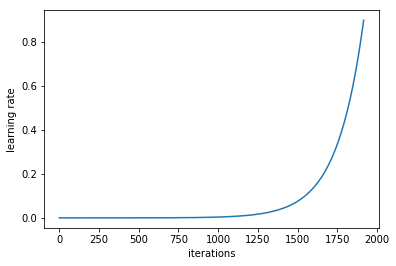

In [26]:
learn.sched.plot_lr()

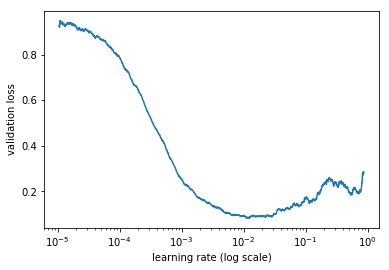

In [27]:
learn.sched.plot()

In [28]:
learn.precompute=False

In [29]:
learn.fit(1e-2, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      0.080318   0.095261   0.970705  
    1      0.07591    0.094177   0.970874  
    2      0.082061   0.092353   0.971177  


[array([0.09235]), 0.9711767043124473]

In [30]:
learn.unfreeze()

In [31]:
learn.save('bs_64_2')

In [32]:
learn.load('bs_64_2')

In [33]:
lr=np.array([1e-4,1e-3,1e-2])

In [34]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.074064   0.085056   0.972995  
    1      0.064536   0.080363   0.974376  
    2      0.053468   0.083609   0.974214  
    3      0.049604   0.086754   0.97387   
    4      0.03779    0.10092    0.972355  
    5      0.02017    0.120228   0.97245   
    6      0.011757   0.127423   0.972456  


[array([0.12742]), 0.9724562431403183]

In [35]:
learn.save('bs_64_3')

In [36]:
learn.load('bs_64_3')

In [40]:
PATH = "/notebooks/data/"
sz=64
bs=64
arch=resnet34

In [41]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz), test_name='test')

In [42]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [44]:
learn.fit(0.01, 2)

epoch      trn_loss   val_loss   accuracy   
    0      0.105136   0.096197   0.970449  
    1      0.079325   0.096687   0.97084   


[array([0.09669]), 0.9708399835686298]

In [45]:
learn.precompute=False

In [46]:
learn.save('v1_PRETRUE')

In [47]:
lrf=learn.lr_find()

 72%|███████▏  | 1681/2320 [00:55<00:21, 30.17it/s, loss=0.24] 

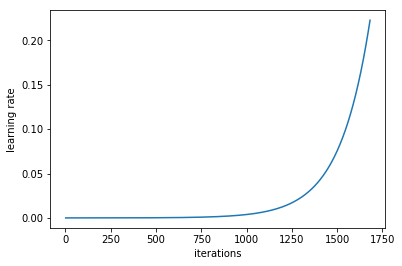

In [48]:
learn.sched.plot_lr()

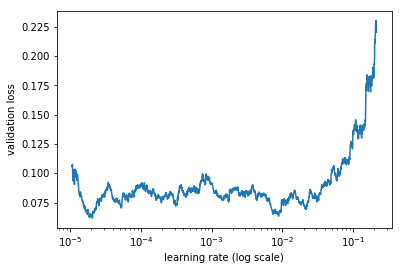

In [49]:
learn.sched.plot()

In [50]:
learn.fit(1e-2, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      0.079218   0.091855   0.971136  
    1      0.080042   0.09285    0.971143  
    2      0.076437   0.091646   0.971231  


[array([0.09165]), 0.9712305796314902]

In [51]:
learn.save('v1_PREFALSE')

In [52]:
learn.load('v1_PREFALSE')

In [53]:
log_preds, y = learn.TTA(is_test=True) # use test dataset rather than validation dataset
probs = np.mean(np.exp(log_preds),0)

In [54]:
probs.shape

(299135, 2)

In [79]:
probs[:10]

array([[0.99665, 0.00335],
       [0.99191, 0.00809],
       [0.99909, 0.00091],
       [0.99944, 0.00056],
       [0.00352, 0.99648],
       [0.99174, 0.00826],
       [0.99549, 0.00451],
       [0.98498, 0.01502],
       [0.99974, 0.00026],
       [0.99897, 0.00103]], dtype=float32)

In [85]:
target=[]
for a, b in probs:
    if a > 0.9:
        target.append(0)
    else:
        target.append(1)

In [86]:
len(target)

299135

In [87]:
df2 = pd.DataFrame(target)

In [88]:
[o[5:-3]+'tif' for o in data.test_ds.fnames][:10]

['test_000000.tif',
 'test_000001.tif',
 'test_000002.tif',
 'test_000003.tif',
 'test_000004.tif',
 'test_000005.tif',
 'test_000006.tif',
 'test_000007.tif',
 'test_000008.tif',
 'test_000009.tif']

In [89]:
df2.insert(0, 'id', [o[5:-3]+'tif' for o in data.test_ds.fnames])

In [91]:
SUBM = f'{PATH}/subm/'
os.makedirs(SUBM, exist_ok=True)
df2.to_csv(f'{SUBM}subm2.csv', index=False, header=False)